In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

# Scikit-learn Soup to Nuts: Developing a Machine-Learning Workflow

In this lecture we will discuss the tools and steps necessary to build a successful machine-learning model.

<center> Adam A Miller  
CIERA/Northwestern & Adler Planetarium  
(c) 2017 Nov 2</center>

### Machine Learning

&nbsp;&nbsp;&nbsp;&nbsp; fundamentally concerned with the problem of classification   
&nbsp;&nbsp;&nbsp;&nbsp; *particularly in regime of large dimensional data sets*  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (methods can be extended to regression)  
  
&nbsp;&nbsp;&nbsp;&nbsp; (glorified) Pattern Matching  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; *a slight over-simplification* 

In other words, be careful about over-interpreting the "learning"...

### Terminology

&nbsp;&nbsp;&nbsp;&nbsp; **Features**   
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; measured properties of objects in the data set  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; can be numerical or categorical (e.g., red vs. blue)

&nbsp;&nbsp;&nbsp;&nbsp; **Labels**  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; target classification or regression variable (to be predicted)

Standard ([supervised](https://en.wikipedia.org/wiki/Supervised_learning)) ML goal: 
  1. **Train** Develop a mapping between *features* and *labels*
  2. **Test** Evaluate performance on labeled data excluded from training
  3. **Predict** Apply the model to sources with unknown labels

Today I will not discuss [unsupervised machine learning](https://en.wikipedia.org/wiki/Unsupervised_learning). Primarily because we do not have time, but also because I have not seen a single useful application of these techniques in my own science.

In brief, unsupervised learning ignores any labels that may be available and instead attempts to cluster sources based on their similarity in the multidimensional feature space. However, once the clusters have been identified there is no mathematical method for measuring the quality of the clusters (and hence my feelings that these methods aren't that useful).

<center>
<img src="images/ML_summary.png" width=850cm>
</center>

### Question 1

Why is the step with the test data necessary?

[Take a few min to dicuss with your partner]

With this simple picture in mind, let's get started.

Today we will be doing everything with the [scikit-learn](http://scikit-learn.org/stable/) package in `python`.

`scikit-learn` is amazing! It has access to just about everything needed to construct the ML workflow, and often there is excellent documentation as well. We will now demonstrate the simplicity of sklearn by building a ML model (in only 4 lines of code!)

In [5]:
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
iris = load_iris()
rf_clf = RandomForestClassifier().fit(iris.data, iris.target)

## Bang

Just like that - you're done. 

Now you can all go home.

As a very important aside - allow me a moment on my soapbox to advise caution regarding the simplicity of `scikit-learn`: the package is so user friendly, and documentation so good, that it is not just easy to build a model, but it is also incredibly easy to become over confident in the model. Generally speaking, ML models are highly subject to noise and training-set biases and the simplicity of `scikit-learn` can consistently lead to a few lines of code that appear to produce outstanding results.

This is the first (but it will not be the last) time that I will implore you to **worry about the data**

On to building a full pipeline...

## 1. Data Preparation

As ML is a data-driven method, the first, and arguably most important step is to curate the data.

  1. Query, observe, simulate, etc. (i.e. collect the observations)
  2. Select features to be used in the model
  3. Determine "ground truth" (i.e. *labels*) for the training set 

Beyond these initial considerations, additional setps to consider include:

  4. Convert categorical features  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; e.g., male, female, male, male $\rightarrow$ [0, 1, 0, 0]
  5. [Impute](https://en.wikipedia.org/wiki/Imputation_(statistics) (or discard) missing data
  6. Feature normalization  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; typically only necessary for certain ML models
  7. Visualize the data  
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; a critical step for all data-science applications

and of course, don't forget...

# Worry About the Data

Today we will work with the famous [iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set), which has the advantage of being small and understandable, but as a result avoids many of the trappings of dealing with real world data. 

There are 3 classes of iris flower: setosa, virginica, and versicolor.

For each flower, 4 features have been measured: petal length, petal width, sepal length, and sepal width.

We will use [`seaborn`](https://seaborn.pydata.org) to visualize the data (but all subsequent work will be in `scikit-learn`).

<IPython.core.display.Javascript object>


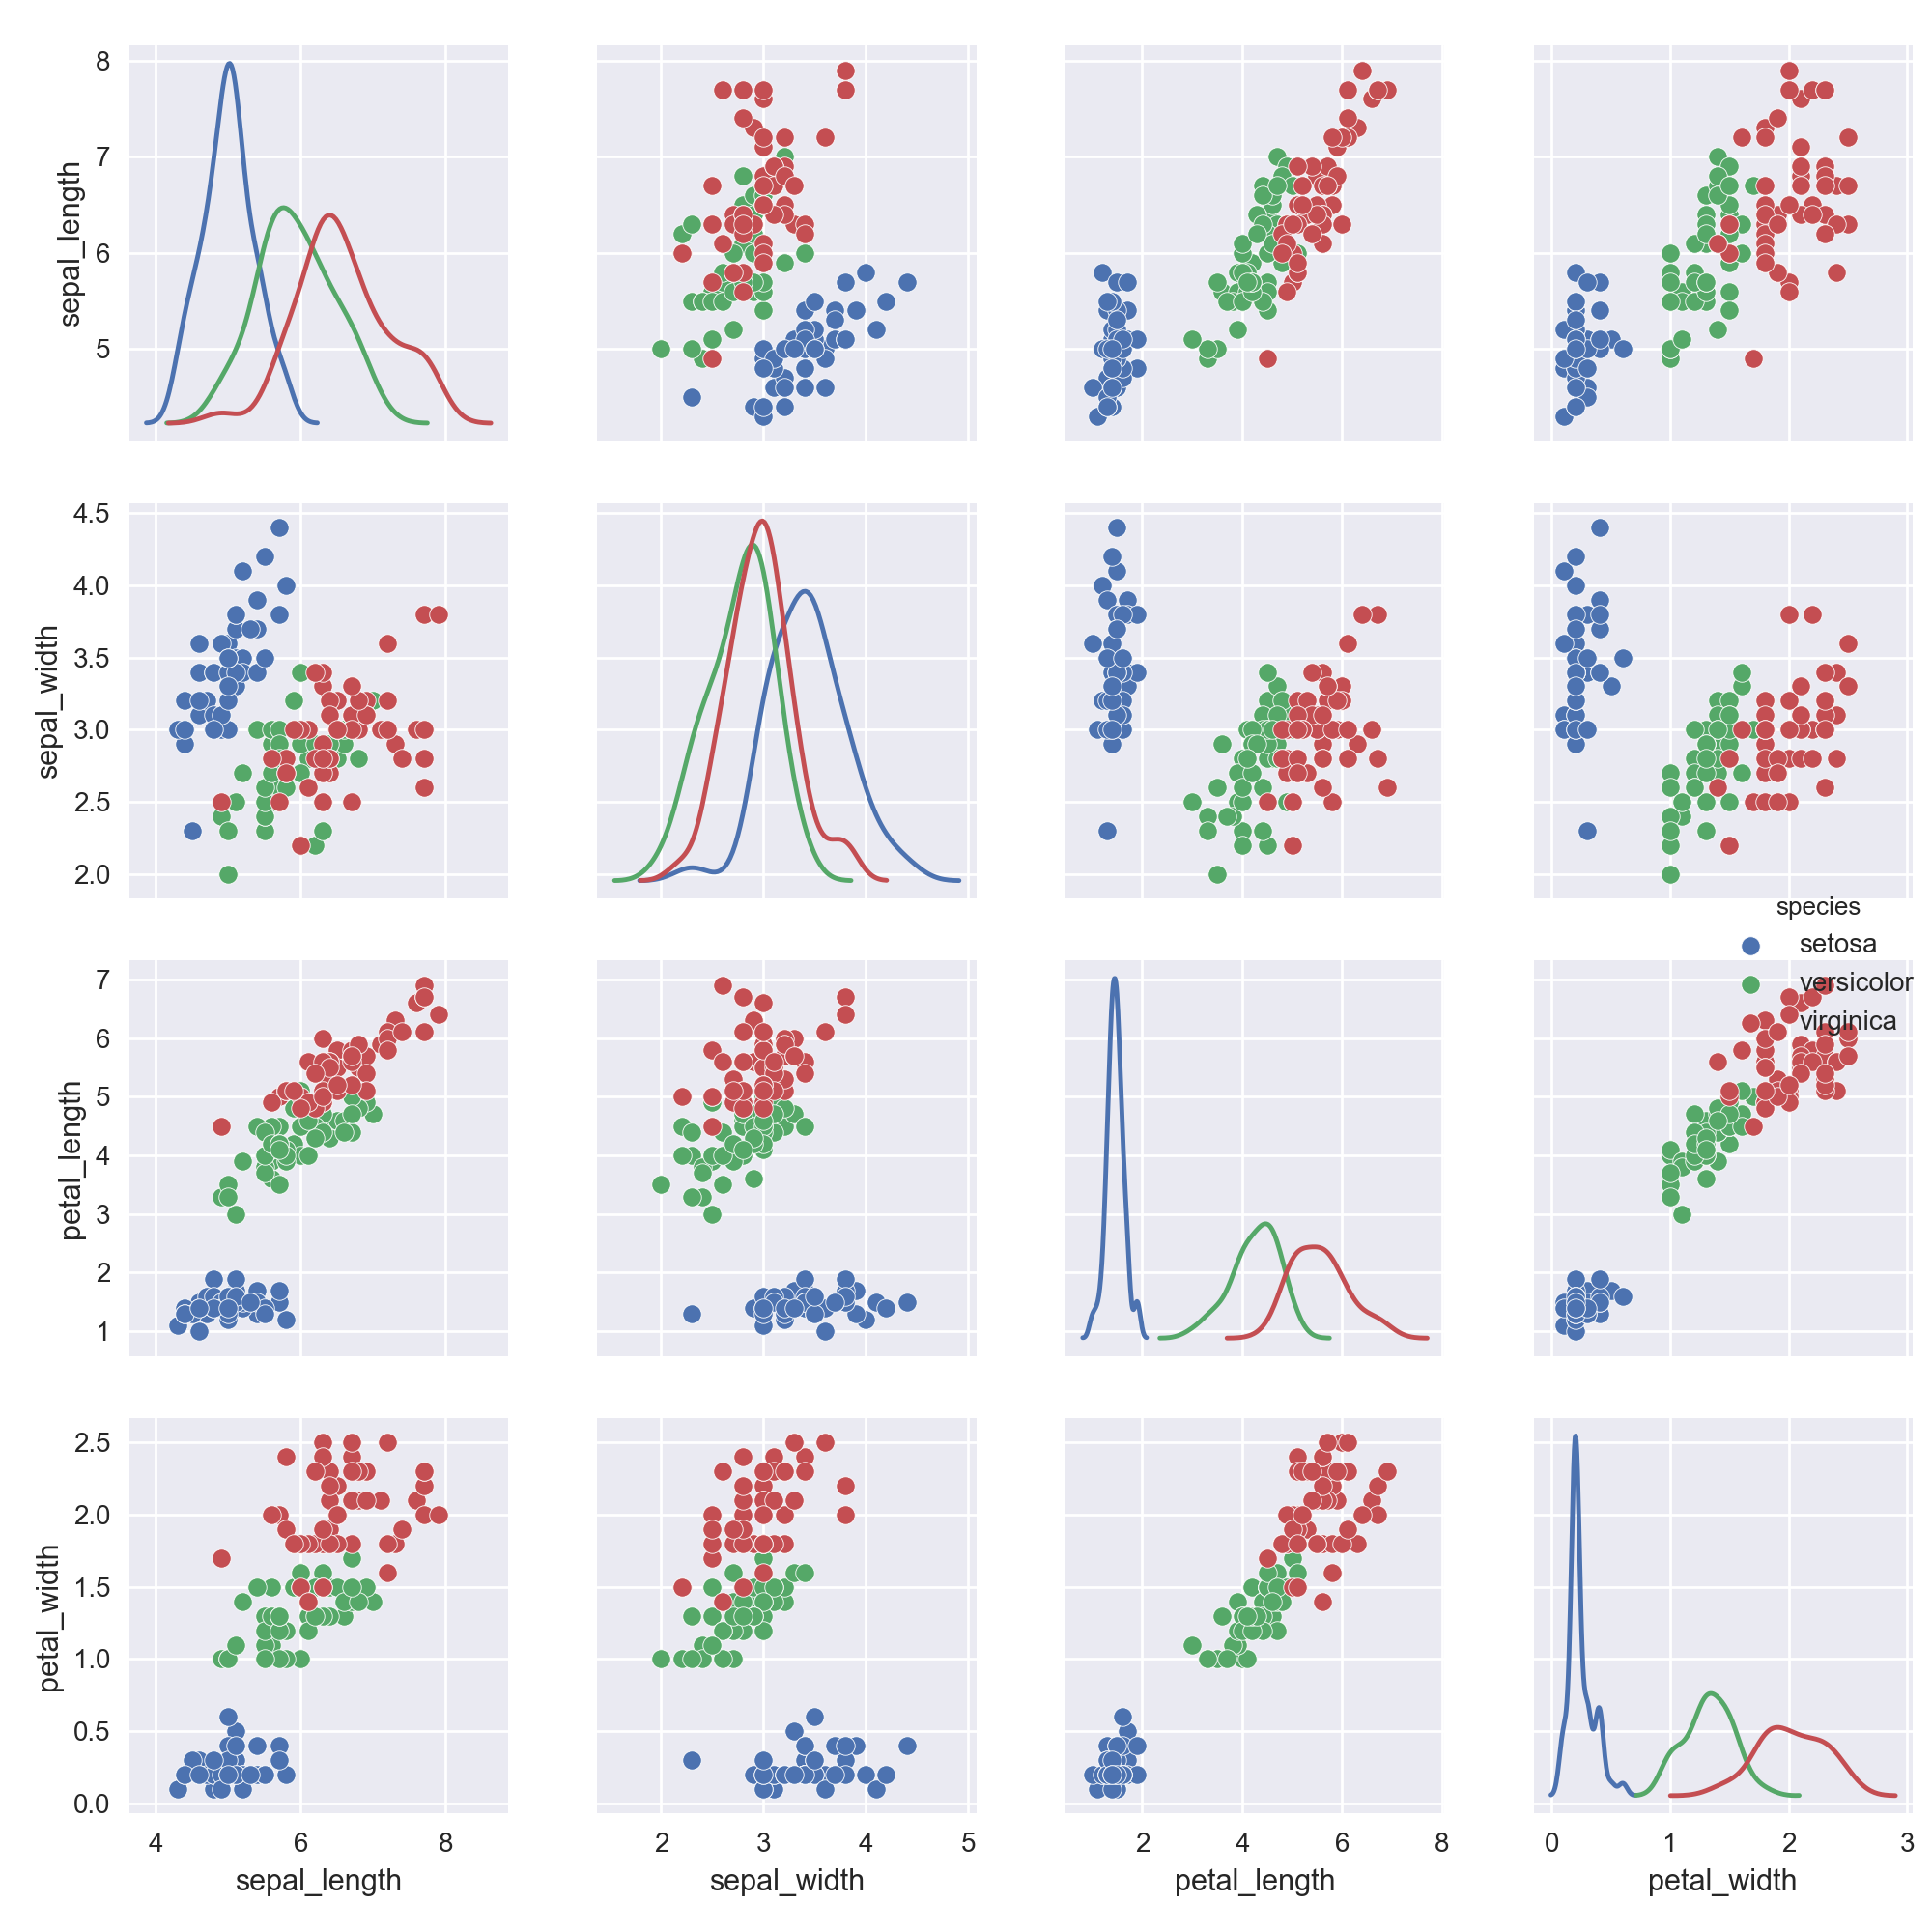

/Users/adamamiller/miniconda3/envs/py36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


In [6]:
import seaborn as sns
iris_df = sns.load_dataset("iris")
sns.pairplot(iris_df, hue="species", diag_kind = "kde")